In [1]:
import textacy
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
%matplotlib inline
from sklearn.feature_extraction import text as TEXT
import re
from nltk.tokenize import RegexpTokenizer,wordpunct_tokenize, sent_tokenize
import os
from gensim.models import ldamulticore
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models, similarities, matutils
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import RegexpTokenizer
from nltk.stem import LancasterStemmer, PorterStemmer
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import nltk
import logging
import pickle
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nlp = spacy.load('en')

# Create a TFiDF Vectorizer for parsing/counting words

In [2]:
pickle_off = open("corpus","rb")
corpus = pickle.load(pickle_off)

### For NMF Model

In [3]:
#Loading pickled data as TFiDf Vectorizer
import pickle
pickle_off = open("mat_tf.pickle","rb")
mat_tf = pickle.load(pickle_off)

pickle_off = open("words2idf_tf","rb")
words2idf_tf = pickle.load(pickle_off)

### For LDA Model

In [4]:
#Loading pickled data as Count Vectorizer
import pickle
pickle_off = open("mat_cv.pickle","rb")
mat_cv = pickle.load(pickle_off)

**Textacy NMF MODEL**  

In [4]:
model = textacy.tm.TopicModel('nmf', n_topics=33)

In [5]:
model.fit(mat_tf)
doc_topic_matrix = model.transform(mat_tf)

In [6]:
doc_topic_matrix.shape

(92579, 33)

In [6]:
for topic_idx, top_terms in model.top_topic_terms(words2idf_tf, top_n=15):
    print('topic', topic_idx, ':', '   '.join(top_terms))

topic 0 : think   film   work   life   live   love   don   world   family   day   book   help   best   million   good
topic 1 : league   club   score   champion   win   season   manchester   goal   barcelona   chelsea   madrid   champion league   striker   premier league   match
topic 2 : obama   president   republicans   romney   clinton   house   republican   vote   democrats   senate   campaign   gop   party   congress   election
topic 3 : syria   syrian   assad   regime   rebel   opposition   chemical   chemical weapons   weapons   damascus   turkey   bashar   government   war   bashar assad
topic 4 : korea   north korea   north   korean   south   kim   south korea   north korean   south korean   pyongyang   jong   kim jong   nuclear   seoul   koreans
topic 5 : police   officer   shoot   arrest   suspect   kill   police officer   authorities   man   report   attack   charge   car   incident   investigation
topic 6 : flight   plane   pilot   crash   airport   airlines   passengers  

In [8]:
#Stories with similar topics:

for topic_idx, top_docs in model.top_topic_docs(doc_topic_matrix, topics=[24,26], top_n=3):
    print("\n"+"\033[1m")
    print("Topic Number : ",topic_idx,"\n")
    for j in top_docs:
        print("Document Number : ",j,"\n")
        print("\033[1m"+corpus[j][:700],"....")
        print("\n")
        



Topic Number :  24 

Document Number :  72489 

(CNN) -- Flush with cash and drunk with power after its $100 billion IPO, Facebook could be caught secretly brainwashing millions of new users into signing up (mind-control hoodies, anyone?) -- and still I might not quit the world's largest social network.

Ridiculous scenario aside, I'm pretty serious. Despite ongoing privacy concerns and rumblings of a backlash, it would take something drastic to make me leave Facebook at this point.

More than just a daily habit, Facebook has become the place where I get important, often surprising glimpses into the lives of the 1,365 people with whom I've chosen to connect. (That's not counting friends-of-friends, for Facebook's tentacles are ever-extend ....


Document Number :  34286 

(CNN) -- Every week, there's a new Facebook thing to gripe about.

This week, there have been two -- and it's only Tuesday.

On Sunday, it was discovered that the 900 million-person social network was "testing" a fe

In [16]:
for i, val in enumerate(model.topic_weights(doc_topic_matrix)):
    print(i, val)
model.topic_weights(doc_topic_matrix)

0 0.105344184777
1 0.0337283369838
2 0.0444780997189
3 0.0561730839408
4 0.0194619307599
5 0.0126263157271
6 0.0355015581778
7 0.0150720468189
8 0.049770314076
9 0.0169844135706
10 0.0200335471587
11 0.026321670137
12 0.0203205176337
13 0.0229774595382
14 0.0180003094406
15 0.0185190518299
16 0.0166868052731
17 0.0286000646348
18 0.0126068192927
19 0.0142265575588
20 0.020218496478
21 0.0207450598903
22 0.0370309419112
23 0.0246745086649
24 0.0289345840566
25 0.0177399851244
26 0.0193987639445
27 0.0312791304182
28 0.0229655434311
29 0.0212568507136
30 0.0189707704301
31 0.0168644465585
32 0.0142120948722
33 0.0261417250883
34 0.0225760166973
35 0.0100793217656
36 0.012178035789
37 0.00985512273814
38 0.0242430464858
39 0.0132024678935


In [31]:
#Documnets with multiple topics
for doc_idx, topics in model.top_doc_topics(doc_topic_matrix, docs=range(3), top_n=3):
    print(corpus[doc_idx][:500], ':', topics)

Arizona's SB1062 has pulled off a sort of political magic trick, in that warring sides can read the bill's text and have not only different reactions, but completely opposite ones.

While proponents of gay rights dub the bill oppressive, those in favor of the bill becoming law say it represents freedom.

Freedom vs. oppression: That's the polar contrast Gov. Jan Brewer must consider as she sits down to "listen to both sides" this week ahead of her decision whether to sign or veto the bill that h : (27, 2, 0)
New Delhi (CNN)"India is about to take off."

That was the bold declaration from India's Finance Minister Arun Jaitley as he delivered his first full-year budget since his party won a resounding victory at the polls last May.

India's budget is a closely-watched TV event, with pre- and post-game analyses on every TV news channel. Even by those standards, Saturday's budget generated more interest than in previous years, in part because of soaring expectations on the new government.


In [56]:
top_doc_topic=model.top_doc_topics(doc_topic_matrix, docs=[157,9], top_n=3, weights=False)

In [57]:
list(top_doc_topic)

[(157, (5, 19, 0)), (9, (24, 19, 0))]

In [39]:
corpus[157]

'Washington (CNN) -- U.S. Park Police began enforcing a ban Monday on camping in two Washington parks, with Occupy protesters at one site defiantly huddling under a large blue tarp that they dubbed the "tent of dreams."\n\nNo one had been arrested as of early Monday afternoon at McPherson Park or Freedom Plaza, Park Police spokesman Sgt. David Schlosser said at an impromptu news conference frequently interrupted by protesters. But some protesters had voluntarily agreed to remove sleeping bags, pillows and housekeeping supplies, he said.\n\nOn Friday, the National Park Service set a noon Monday deadline for protesters who have occupied the parks for months to remove their camping gear. Park officials said protesters would be allowed to remain around the clock and keep up tents, so long as one side of each tent remains open at all times, officials said.\n\nGeorgia resident Dane Charles Primerano filed a complaint and motion for a temporary restraining order in U.S. District Court in Wash

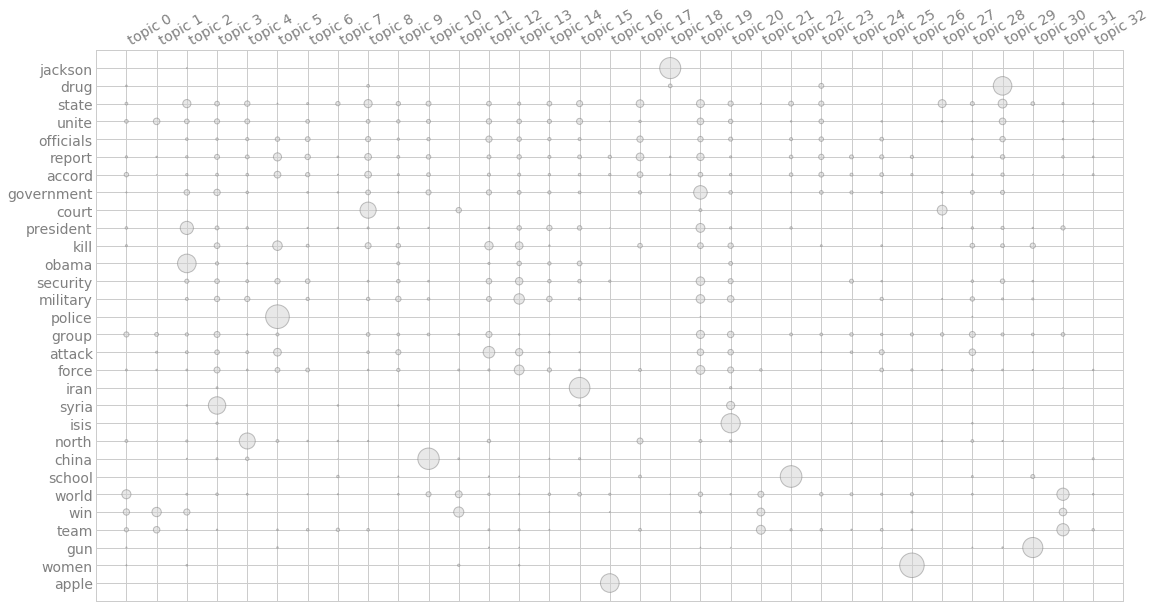

In [55]:

model.termite_plot(mat_tf, words2idf_tf,topics=-1,  n_terms=30, sort_terms_by='seriation',);

In [52]:
matplotlib.style.use('fivethirtyeight')

In [49]:
import matplotlib.style